In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError

In [2]:
from tensorflow.keras.losses import MeanAbsoluteError

In [3]:
TRAIN_DATA_PATH = 'dataframe.csv'
TEST_DATA_PATH = 'target.csv'
TARGET_NAME = 'crimes'

In [4]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

In [5]:
train_data

,ID,accidents,attractions,nature,traffic,duration,length
0,0.0,3.0,0.0,159627.730267,0.936027,594.0,4386.0
1,1.0,14.0,0.0,150019.960244,0.940063,634.0,4682.0
2,2.0,3.0,0.0,136535.383810,0.942004,569.0,4306.0
3,3.0,15.0,0.0,131720.927792,0.880435,736.0,5723.0
4,4.0,3.0,0.0,140749.174738,0.926582,790.0,5785.0
...,...,...,...,...,...,...,...
3165,3165.0,109.0,2.0,511856.796442,0.890813,1328.0,15072.0
3166,3166.0,86.0,0.0,667051.802766,0.868759,1402.0,12234.0
3167,3167.0,70.0,2.0,442868.647098,0.925040,1254.0,17589.0
3168,3168.0,75.0,2.0,432106.118161,0.812731,1351.0,16755.0


In [6]:
test_data

,crimes
0,93945.0
1,95832.0
2,97630.0
3,104882.0
4,108461.0
...,...
3165,73238.0
3166,119890.0
3167,88488.0
3168,156248.0


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, test_data, 
                                                    train_size = 0.7, random_state = 20)

In [8]:
x_train

,ID,accidents,attractions,nature,traffic,duration,length
2652,2652.0,165.0,0.0,2.283921e+05,0.892023,1028.0,14836.0
1882,1882.0,76.0,1.0,9.016002e+05,0.901998,2102.0,16556.0
943,943.0,152.0,0.0,6.128505e+05,0.663906,3139.0,17695.0
2133,2133.0,200.0,6.0,7.819394e+05,0.761959,2634.0,18076.0
172,172.0,24.0,0.0,8.444401e+04,0.803030,660.0,3066.0
...,...,...,...,...,...,...,...
1428,1428.0,242.0,2.0,4.868700e+05,0.934641,1530.0,26644.0
2441,2441.0,120.0,3.0,1.207933e+06,0.800738,2981.0,18632.0
2972,2972.0,58.0,5.0,6.899372e+05,0.788921,1715.0,12888.0
271,271.0,264.0,2.0,5.406191e+05,0.902391,2049.0,32246.0


## Tensorflow Model-1

In [9]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [10]:
def fit_model(model):
    history = model.fit(
        x_train.values, 
        y_train.values, 
        epochs=100, 
        batch_size=64,
        validation_split=0.2
    )
    return history

In [11]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

In [12]:
# build the model
model = build_model_using_sequential()

# compile the model
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
history = fit_model(model)

Epoch 1/100
28/28 [==============================] - 0s 12ms/step - loss: 5.3370 - mean_squared_logarithmic_error: 5.2996 - val_loss: 2.1667 - val_mean_squared_logarithmic_error: 2.1668
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 1.2319 - mean_squared_logarithmic_error: 1.2296 - val_loss: 1.2527 - val_mean_squared_logarithmic_error: 1.2533
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.9499 - mean_squared_logarithmic_error: 0.9514 - val_loss: 0.9404 - val_mean_squared_logarithmic_error: 0.9413
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.8424 - mean_squared_logarithmic_error: 0.8410 - val_loss: 0.8064 - val_mean_squared_logarithmic_error: 0.8077
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.8017 - mean_squared_logarithmic_error: 0.8021 - val_loss: 0.8235 - val_mean_squared_logarithmic_error: 0.8246
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0

28/28 [==============================] - 0s 4ms/step - loss: 0.3946 - mean_squared_logarithmic_error: 0.3943 - val_loss: 0.3141 - val_mean_squared_logarithmic_error: 0.3139
Epoch 46/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3292 - mean_squared_logarithmic_error: 0.3291 - val_loss: 0.2845 - val_mean_squared_logarithmic_error: 0.2844
Epoch 47/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3481 - mean_squared_logarithmic_error: 0.3488 - val_loss: 0.3017 - val_mean_squared_logarithmic_error: 0.3015
Epoch 48/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3851 - mean_squared_logarithmic_error: 0.3850 - val_loss: 0.2905 - val_mean_squared_logarithmic_error: 0.2903
Epoch 49/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3403 - mean_squared_logarithmic_error: 0.3415 - val_loss: 0.2914 - val_mean_squared_logarithmic_error: 0.2913
Epoch 50/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3401 - 

28/28 [==============================] - 0s 5ms/step - loss: 0.3645 - mean_squared_logarithmic_error: 0.3647 - val_loss: 0.3927 - val_mean_squared_logarithmic_error: 0.3926
Epoch 90/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3825 - mean_squared_logarithmic_error: 0.3813 - val_loss: 0.2956 - val_mean_squared_logarithmic_error: 0.2956
Epoch 91/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3632 - mean_squared_logarithmic_error: 0.3638 - val_loss: 0.6301 - val_mean_squared_logarithmic_error: 0.6298
Epoch 92/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4043 - mean_squared_logarithmic_error: 0.4062 - val_loss: 0.3514 - val_mean_squared_logarithmic_error: 0.3512
Epoch 93/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3291 - mean_squared_logarithmic_error: 0.3277 - val_loss: 0.2909 - val_mean_squared_logarithmic_error: 0.2907
Epoch 94/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3011 - 

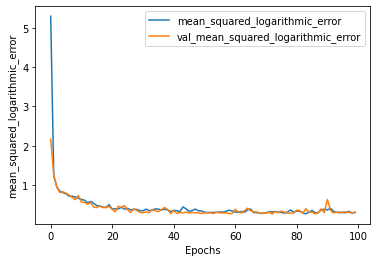

In [13]:
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [14]:
rmse = tf.keras.metrics.RootMeanSquaredError()

## ROC Curve

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

### msle model

In [16]:
y_pred_msle = model.predict(x_test)

In [17]:
y_pred = pd.DataFrame(data = y_pred_msle, columns = ['crimes'])

In [18]:
def naive_roc_auc_score(y_true, y_pred):
    
  num_same_sign = 0
  num_pairs = 0
  
  for a in range(len(y_true)):
    for b in range(len(y_true)):
      if y_true[a] > y_true[b]:
        num_pairs += 1
        if y_pred[a] > y_pred[b]:
          num_same_sign += 1
        elif y_pred[a] == y_pred[b]:
          num_same_sign += .5
        
  return num_same_sign / num_pairs

In [19]:
naive_roc_auc_score(y_test.values, y_pred.values)

0.8136897448668992

## Tensorflow Model-2

In [20]:
hidden_units1 = 480
hidden_units2 = 256
hidden_units3 = 160
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential_2():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [21]:
# build the model
model_ = build_model_using_sequential_2()

model_.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
trained_model = fit_model(model_)

Epoch 1/100
28/28 [==============================] - 0s 9ms/step - loss: 7.1487 - mean_squared_logarithmic_error: 7.1144 - val_loss: 3.4622 - val_mean_squared_logarithmic_error: 3.4621
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 2.3653 - mean_squared_logarithmic_error: 2.3514 - val_loss: 1.1510 - val_mean_squared_logarithmic_error: 1.1517
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.9673 - mean_squared_logarithmic_error: 0.9677 - val_loss: 0.9793 - val_mean_squared_logarithmic_error: 0.9801
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.8992 - mean_squared_logarithmic_error: 0.9014 - val_loss: 0.8239 - val_mean_squared_logarithmic_error: 0.8252
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.8352 - mean_squared_logarithmic_error: 0.8342 - val_loss: 0.8086 - val_mean_squared_logarithmic_error: 0.8098
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.2885 - mean_squared_logarithmic_error: 0.2881 - val_loss: 0.2455 - val_mean_squared_logarithmic_error: 0.2456
Epoch 46/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2945 - mean_squared_logarithmic_error: 0.2946 - val_loss: 0.3049 - val_mean_squared_logarithmic_error: 0.3049
Epoch 47/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2726 - mean_squared_logarithmic_error: 0.2727 - val_loss: 0.3701 - val_mean_squared_logarithmic_error: 0.3700
Epoch 48/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2910 - mean_squared_logarithmic_error: 0.2919 - val_loss: 0.2640 - val_mean_squared_logarithmic_error: 0.2640
Epoch 49/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2935 - mean_squared_logarithmic_error: 0.2933 - val_loss: 0.3931 - val_mean_squared_logarithmic_error: 0.3931
Epoch 50/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2814 - 

28/28 [==============================] - 0s 4ms/step - loss: 0.2631 - mean_squared_logarithmic_error: 0.2632 - val_loss: 0.2586 - val_mean_squared_logarithmic_error: 0.2587
Epoch 90/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2572 - mean_squared_logarithmic_error: 0.2571 - val_loss: 0.2541 - val_mean_squared_logarithmic_error: 0.2540
Epoch 91/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2477 - mean_squared_logarithmic_error: 0.2470 - val_loss: 0.2515 - val_mean_squared_logarithmic_error: 0.2516
Epoch 92/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2555 - mean_squared_logarithmic_error: 0.2546 - val_loss: 0.2278 - val_mean_squared_logarithmic_error: 0.2280
Epoch 93/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2431 - mean_squared_logarithmic_error: 0.2429 - val_loss: 0.2365 - val_mean_squared_logarithmic_error: 0.2366
Epoch 94/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2531 - 

In [22]:
y_pred_2 = pd.DataFrame(data = model_.predict(x_test), columns = ['crimes'])

In [23]:
naive_roc_auc_score(y_test.values, y_pred_2.values)

0.8205014112568487

## Tensorflow Model-3

In [24]:
hidden_units1 = 512
hidden_units2 = 256
hidden_units3 = 128
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential_3():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [25]:
# build the model
model_1 = build_model_using_sequential_3()

model_1.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
trained_model1 = fit_model(model_1)

Epoch 1/100
28/28 [==============================] - 0s 14ms/step - loss: 6.7340 - mean_squared_logarithmic_error: 6.7487 - val_loss: 9.8071 - val_mean_squared_logarithmic_error: 9.8065
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 6.8168 - mean_squared_logarithmic_error: 6.7729 - val_loss: 1.5281 - val_mean_squared_logarithmic_error: 1.5285
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 2.9966 - mean_squared_logarithmic_error: 2.9788 - val_loss: 1.1491 - val_mean_squared_logarithmic_error: 1.1497
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.9501 - mean_squared_logarithmic_error: 0.9494 - val_loss: 0.8879 - val_mean_squared_logarithmic_error: 0.8890
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.8308 - mean_squared_logarithmic_error: 0.8312 - val_loss: 0.7846 - val_mean_squared_logarithmic_error: 0.7858
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0

28/28 [==============================] - 0s 4ms/step - loss: 0.3018 - mean_squared_logarithmic_error: 0.3020 - val_loss: 0.2644 - val_mean_squared_logarithmic_error: 0.2644
Epoch 46/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3227 - mean_squared_logarithmic_error: 0.3230 - val_loss: 0.2832 - val_mean_squared_logarithmic_error: 0.2831
Epoch 47/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3466 - mean_squared_logarithmic_error: 0.3458 - val_loss: 0.5015 - val_mean_squared_logarithmic_error: 0.5013
Epoch 48/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3458 - mean_squared_logarithmic_error: 0.3461 - val_loss: 0.2736 - val_mean_squared_logarithmic_error: 0.2735
Epoch 49/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2984 - mean_squared_logarithmic_error: 0.2991 - val_loss: 0.2478 - val_mean_squared_logarithmic_error: 0.2478
Epoch 50/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3150 - 

28/28 [==============================] - 0s 4ms/step - loss: 0.2782 - mean_squared_logarithmic_error: 0.2773 - val_loss: 0.2693 - val_mean_squared_logarithmic_error: 0.2693
Epoch 90/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2737 - mean_squared_logarithmic_error: 0.2738 - val_loss: 0.2761 - val_mean_squared_logarithmic_error: 0.2763
Epoch 91/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2694 - mean_squared_logarithmic_error: 0.2692 - val_loss: 0.2632 - val_mean_squared_logarithmic_error: 0.2633
Epoch 92/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2739 - mean_squared_logarithmic_error: 0.2740 - val_loss: 0.2720 - val_mean_squared_logarithmic_error: 0.2720
Epoch 93/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2789 - mean_squared_logarithmic_error: 0.2788 - val_loss: 0.2410 - val_mean_squared_logarithmic_error: 0.2411
Epoch 94/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2676 - 

In [26]:
y_pred_3 = pd.DataFrame(data = model_1.predict(x_test), columns = ['crimes'])

In [27]:
naive_roc_auc_score(y_test.values, y_pred_3.values)

0.8020477060158282

In [28]:
mae = MeanAbsoluteError()

In [29]:
mse = MeanSquaredError()

In [30]:
model_mae = build_model_using_sequential_3()
model_mae.compile(
    loss=mae, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mae]
)

In [31]:
fitted_model_mae = fit_model(model_mae)

Epoch 1/100
28/28 [==============================] - 0s 10ms/step - loss: 301782.4375 - mean_absolute_error: 302069.7812 - val_loss: 296291.1875 - val_mean_absolute_error: 296651.2500
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 265799.4688 - mean_absolute_error: 265922.7500 - val_loss: 254008.2656 - val_mean_absolute_error: 254490.9844
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 261180.5156 - mean_absolute_error: 260414.8594 - val_loss: 272068.3125 - val_mean_absolute_error: 272449.0938
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 256984.8438 - mean_absolute_error: 257508.3906 - val_loss: 245733.2656 - val_mean_absolute_error: 246143.0938
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 243886.8594 - mean_absolute_error: 244107.0938 - val_loss: 283535.6875 - val_mean_absolute_error: 283805.5000
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 250005.7656

28/28 [==============================] - 0s 5ms/step - loss: 147146.8281 - mean_absolute_error: 147129.9062 - val_loss: 141481.5312 - val_mean_absolute_error: 141684.7812
Epoch 46/100
28/28 [==============================] - 0s 4ms/step - loss: 172188.7031 - mean_absolute_error: 171822.9062 - val_loss: 196303.2812 - val_mean_absolute_error: 196368.7031
Epoch 47/100
28/28 [==============================] - 0s 4ms/step - loss: 162785.8281 - mean_absolute_error: 163006.6094 - val_loss: 129356.4531 - val_mean_absolute_error: 129531.5859
Epoch 48/100
28/28 [==============================] - 0s 5ms/step - loss: 153454.4219 - mean_absolute_error: 153375.3594 - val_loss: 175067.0781 - val_mean_absolute_error: 175231.6562
Epoch 49/100
28/28 [==============================] - 0s 4ms/step - loss: 156792.2344 - mean_absolute_error: 156927.3281 - val_loss: 147338.6094 - val_mean_absolute_error: 147526.0781
Epoch 50/100
28/28 [==============================] - 0s 5ms/step - loss: 156401.3594 - mean_

28/28 [==============================] - 0s 4ms/step - loss: 155073.8594 - mean_absolute_error: 154800.4062 - val_loss: 129908.2188 - val_mean_absolute_error: 130095.5547
Epoch 90/100
28/28 [==============================] - 0s 4ms/step - loss: 145924.2031 - mean_absolute_error: 145681.2188 - val_loss: 129496.0781 - val_mean_absolute_error: 129698.0703
Epoch 91/100
28/28 [==============================] - 0s 4ms/step - loss: 155573.4062 - mean_absolute_error: 155636.9531 - val_loss: 130699.8438 - val_mean_absolute_error: 130895.5859
Epoch 92/100
28/28 [==============================] - 0s 4ms/step - loss: 141231.9531 - mean_absolute_error: 141724.0938 - val_loss: 129598.5234 - val_mean_absolute_error: 129799.7266
Epoch 93/100
28/28 [==============================] - 0s 4ms/step - loss: 147979.5000 - mean_absolute_error: 147958.1562 - val_loss: 142861.5625 - val_mean_absolute_error: 142982.4531
Epoch 94/100
28/28 [==============================] - 0s 4ms/step - loss: 150709.4531 - mean_

In [32]:
# Plot the fitted_model
def plot_history_(history, key):
  plt.plot(history.history[key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.show()

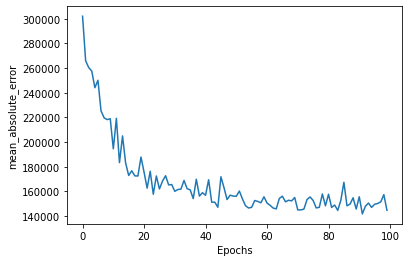

In [33]:
plot_history_(fitted_model_mae, "mean_absolute_error")

In [34]:
model_rmse = build_model_using_sequential_3()

In [35]:
model_rmse.compile(
        loss=mse, 
        optimizer=Adam(learning_rate=learning_rate), 
        metrics=[rmse]
    )

Epoch 1/100
28/28 [==============================] - 0s 9ms/step - loss: 250550845440.0000 - root_mean_squared_error: 500550.5312 - val_loss: 184705908736.0000 - val_root_mean_squared_error: 429774.2500
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 175323774976.0000 - root_mean_squared_error: 418716.8125 - val_loss: 165414682624.0000 - val_root_mean_squared_error: 406712.0312
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 150583984128.0000 - root_mean_squared_error: 388051.5312 - val_loss: 146988433408.0000 - val_root_mean_squared_error: 383390.7188
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 144946315264.0000 - root_mean_squared_error: 380718.1562 - val_loss: 152952815616.0000 - val_root_mean_squared_error: 391091.8125
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 135548829696.0000 - root_mean_squared_error: 368169.5625 - val_loss: 184997445632.0000 - val_root_mean_squared_erro

28/28 [==============================] - 0s 4ms/step - loss: 57984937984.0000 - root_mean_squared_error: 240800.6250 - val_loss: 48048087040.0000 - val_root_mean_squared_error: 219198.7344
Epoch 42/100
28/28 [==============================] - 0s 4ms/step - loss: 51239165952.0000 - root_mean_squared_error: 226360.7031 - val_loss: 36136939520.0000 - val_root_mean_squared_error: 190097.1875
Epoch 43/100
28/28 [==============================] - 0s 4ms/step - loss: 50870415360.0000 - root_mean_squared_error: 225544.7031 - val_loss: 55750979584.0000 - val_root_mean_squared_error: 236116.4531
Epoch 44/100
28/28 [==============================] - 0s 4ms/step - loss: 56724353024.0000 - root_mean_squared_error: 238168.7500 - val_loss: 40453550080.0000 - val_root_mean_squared_error: 201130.6719
Epoch 45/100
28/28 [==============================] - 0s 4ms/step - loss: 56307163136.0000 - root_mean_squared_error: 237291.2969 - val_loss: 55873650688.0000 - val_root_mean_squared_error: 236376.0781
Epo

Epoch 82/100
28/28 [==============================] - 0s 4ms/step - loss: 49358872576.0000 - root_mean_squared_error: 222168.5625 - val_loss: 33366263808.0000 - val_root_mean_squared_error: 182664.3438
Epoch 83/100
28/28 [==============================] - 0s 4ms/step - loss: 41260683264.0000 - root_mean_squared_error: 203127.2656 - val_loss: 37941727232.0000 - val_root_mean_squared_error: 194786.3594
Epoch 84/100
28/28 [==============================] - 0s 4ms/step - loss: 41921142784.0000 - root_mean_squared_error: 204746.5312 - val_loss: 32198393856.0000 - val_root_mean_squared_error: 179439.1094
Epoch 85/100
28/28 [==============================] - 0s 4ms/step - loss: 50290024448.0000 - root_mean_squared_error: 224254.3750 - val_loss: 58494443520.0000 - val_root_mean_squared_error: 241856.2500
Epoch 86/100
28/28 [==============================] - 0s 4ms/step - loss: 49618370560.0000 - root_mean_squared_error: 222751.8125 - val_loss: 37185441792.0000 - val_root_mean_squared_error: 19

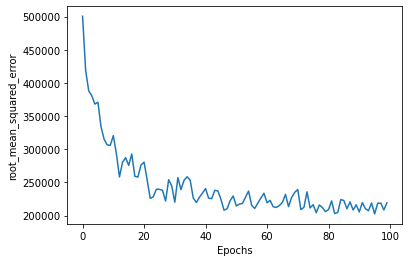

In [36]:
# Plot the fitted_model
plot_history_(fit_model(model_rmse), 'root_mean_squared_error')

## Tensorflow Model-4

In [37]:
hidden_units1 = 480
hidden_units2 = 256
hidden_units3 = 160
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential_4():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='elu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [38]:
# build the model
model_2 = build_model_using_sequential_4()

model_2.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
trained_model2 = fit_model(model_2)

Epoch 1/100
28/28 [==============================] - 0s 11ms/step - loss: 8.4722 - mean_squared_logarithmic_error: 8.4261 - val_loss: 5.0838 - val_mean_squared_logarithmic_error: 5.0836
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 2.0999 - mean_squared_logarithmic_error: 2.0875 - val_loss: 1.2459 - val_mean_squared_logarithmic_error: 1.2464
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.8652 - mean_squared_logarithmic_error: 0.8631 - val_loss: 0.7960 - val_mean_squared_logarithmic_error: 0.7975
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.7728 - mean_squared_logarithmic_error: 0.7736 - val_loss: 0.7405 - val_mean_squared_logarithmic_error: 0.7418
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.7385 - mean_squared_logarithmic_error: 0.7378 - val_loss: 0.6935 - val_mean_squared_logarithmic_error: 0.6949
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0

28/28 [==============================] - 0s 4ms/step - loss: 0.2932 - mean_squared_logarithmic_error: 0.2939 - val_loss: 0.3480 - val_mean_squared_logarithmic_error: 0.3479
Epoch 46/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3291 - mean_squared_logarithmic_error: 0.3293 - val_loss: 0.3353 - val_mean_squared_logarithmic_error: 0.3353
Epoch 47/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3238 - mean_squared_logarithmic_error: 0.3235 - val_loss: 0.2495 - val_mean_squared_logarithmic_error: 0.2495
Epoch 48/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2944 - mean_squared_logarithmic_error: 0.2947 - val_loss: 0.2411 - val_mean_squared_logarithmic_error: 0.2411
Epoch 49/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2739 - mean_squared_logarithmic_error: 0.2744 - val_loss: 0.2637 - val_mean_squared_logarithmic_error: 0.2637
Epoch 50/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2796 - 

28/28 [==============================] - 0s 4ms/step - loss: 0.2927 - mean_squared_logarithmic_error: 0.2941 - val_loss: 0.2521 - val_mean_squared_logarithmic_error: 0.2521
Epoch 90/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2706 - mean_squared_logarithmic_error: 0.2710 - val_loss: 0.2963 - val_mean_squared_logarithmic_error: 0.2962
Epoch 91/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2792 - mean_squared_logarithmic_error: 0.2794 - val_loss: 0.2482 - val_mean_squared_logarithmic_error: 0.2484
Epoch 92/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2591 - mean_squared_logarithmic_error: 0.2585 - val_loss: 0.2268 - val_mean_squared_logarithmic_error: 0.2271
Epoch 93/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2761 - mean_squared_logarithmic_error: 0.2777 - val_loss: 0.2248 - val_mean_squared_logarithmic_error: 0.2250
Epoch 94/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2734 - 

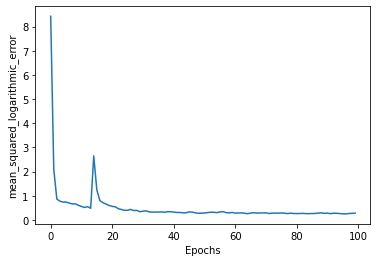

In [39]:
plot_history_(trained_model2, 'mean_squared_logarithmic_error')

Epoch 1/100
28/28 [==============================] - 0s 10ms/step - loss: 307306.5000 - mean_absolute_error: 307269.2188 - val_loss: 269855.8125 - val_mean_absolute_error: 270274.6875
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 270228.1875 - mean_absolute_error: 269985.3438 - val_loss: 254144.5000 - val_mean_absolute_error: 254617.0000
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 271399.8750 - mean_absolute_error: 271478.4375 - val_loss: 266682.1562 - val_mean_absolute_error: 267231.0312
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 254384.4844 - mean_absolute_error: 254514.2031 - val_loss: 238837.9688 - val_mean_absolute_error: 239278.6719
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 241685.6406 - mean_absolute_error: 241859.4062 - val_loss: 227332.5938 - val_mean_absolute_error: 227689.9062
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 241052.7969

28/28 [==============================] - 0s 5ms/step - loss: 158687.4219 - mean_absolute_error: 158386.5000 - val_loss: 130619.4453 - val_mean_absolute_error: 130781.8594
Epoch 46/100
28/28 [==============================] - 0s 6ms/step - loss: 166908.8750 - mean_absolute_error: 167373.0781 - val_loss: 143153.8125 - val_mean_absolute_error: 143303.8438
Epoch 47/100
28/28 [==============================] - 0s 4ms/step - loss: 157350.5625 - mean_absolute_error: 156985.8438 - val_loss: 138862.9688 - val_mean_absolute_error: 139042.0312
Epoch 48/100
28/28 [==============================] - 0s 5ms/step - loss: 160874.0938 - mean_absolute_error: 160648.4531 - val_loss: 183566.2344 - val_mean_absolute_error: 183692.9062
Epoch 49/100
28/28 [==============================] - 0s 5ms/step - loss: 163020.6719 - mean_absolute_error: 162707.2500 - val_loss: 132830.8438 - val_mean_absolute_error: 133026.1094
Epoch 50/100
28/28 [==============================] - 0s 5ms/step - loss: 158451.9062 - mean_

28/28 [==============================] - 0s 4ms/step - loss: 148087.2031 - mean_absolute_error: 148110.6719 - val_loss: 138764.7188 - val_mean_absolute_error: 138895.7188
Epoch 90/100
28/28 [==============================] - 0s 4ms/step - loss: 145757.6250 - mean_absolute_error: 145831.9375 - val_loss: 127129.3438 - val_mean_absolute_error: 127345.2344
Epoch 91/100
28/28 [==============================] - 0s 4ms/step - loss: 148169.5156 - mean_absolute_error: 148201.0625 - val_loss: 129354.2734 - val_mean_absolute_error: 129533.4922
Epoch 92/100
28/28 [==============================] - 0s 4ms/step - loss: 144547.1562 - mean_absolute_error: 144545.0156 - val_loss: 134483.3750 - val_mean_absolute_error: 134689.4688
Epoch 93/100
28/28 [==============================] - 0s 4ms/step - loss: 145444.6719 - mean_absolute_error: 144993.0312 - val_loss: 130992.2734 - val_mean_absolute_error: 131171.0938
Epoch 94/100
28/28 [==============================] - 0s 5ms/step - loss: 148886.2188 - mean_

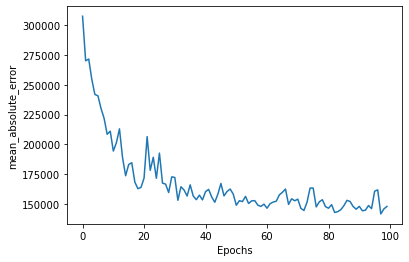

In [40]:
model_mae2 = build_model_using_sequential_4()
model_mae2.compile(
    loss=mae, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mae]
)
plot_history_(fit_model(model_mae2), "mean_absolute_error")

Epoch 1/100
28/28 [==============================] - 0s 10ms/step - loss: 218081951744.0000 - root_mean_squared_error: 425557.3750 - val_loss: 184924815360.0000 - val_root_mean_squared_error: 430028.8438
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 164889706496.0000 - root_mean_squared_error: 406066.1250 - val_loss: 162805415936.0000 - val_root_mean_squared_error: 403491.5312
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 158068883456.0000 - root_mean_squared_error: 397578.7812 - val_loss: 146279825408.0000 - val_root_mean_squared_error: 382465.4688
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 156456042496.0000 - root_mean_squared_error: 395545.2500 - val_loss: 199594835968.0000 - val_root_mean_squared_error: 446760.3750
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 155416379392.0000 - root_mean_squared_error: 394228.8438 - val_loss: 128370982912.0000 - val_root_mean_squared_err

28/28 [==============================] - 0s 4ms/step - loss: 48838864896.0000 - root_mean_squared_error: 220995.1719 - val_loss: 37623005184.0000 - val_root_mean_squared_error: 193966.5000
Epoch 42/100
28/28 [==============================] - 0s 4ms/step - loss: 51197100032.0000 - root_mean_squared_error: 226267.7656 - val_loss: 39597531136.0000 - val_root_mean_squared_error: 198991.2812
Epoch 43/100
28/28 [==============================] - 0s 4ms/step - loss: 52154544128.0000 - root_mean_squared_error: 228373.6875 - val_loss: 40025186304.0000 - val_root_mean_squared_error: 200062.9531
Epoch 44/100
28/28 [==============================] - 0s 4ms/step - loss: 60196392960.0000 - root_mean_squared_error: 245349.5312 - val_loss: 50858287104.0000 - val_root_mean_squared_error: 225517.8125
Epoch 45/100
28/28 [==============================] - 0s 4ms/step - loss: 56217321472.0000 - root_mean_squared_error: 237101.9219 - val_loss: 36089819136.0000 - val_root_mean_squared_error: 189973.2031
Epo

Epoch 82/100
28/28 [==============================] - 0s 4ms/step - loss: 46579998720.0000 - root_mean_squared_error: 215824.0000 - val_loss: 39008980992.0000 - val_root_mean_squared_error: 197506.9062
Epoch 83/100
28/28 [==============================] - 0s 4ms/step - loss: 43132506112.0000 - root_mean_squared_error: 207683.6719 - val_loss: 34080878592.0000 - val_root_mean_squared_error: 184610.0781
Epoch 84/100
28/28 [==============================] - 0s 4ms/step - loss: 44027871232.0000 - root_mean_squared_error: 209828.1875 - val_loss: 33916569600.0000 - val_root_mean_squared_error: 184164.5156
Epoch 85/100
28/28 [==============================] - 0s 4ms/step - loss: 48068730880.0000 - root_mean_squared_error: 219245.8281 - val_loss: 34104363008.0000 - val_root_mean_squared_error: 184673.6719
Epoch 86/100
28/28 [==============================] - 0s 4ms/step - loss: 44815511552.0000 - root_mean_squared_error: 211696.7500 - val_loss: 36292468736.0000 - val_root_mean_squared_error: 19

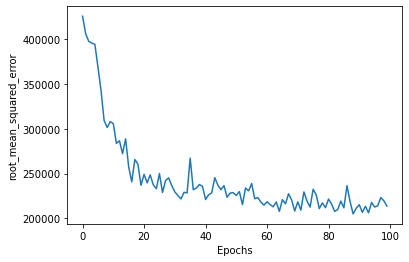

In [41]:
model_rmse2 = build_model_using_sequential_4()
model_rmse2.compile(
        loss=mse, 
        optimizer=Adam(learning_rate=learning_rate), 
        metrics=[rmse]
    )
# Plot the fitted_model
plot_history_(fit_model(model_rmse2), 'root_mean_squared_error')

In [42]:
y_pred_4 = pd.DataFrame(data = model_2.predict(x_test), columns = ['crimes'])

In [43]:
naive_roc_auc_score(y_test.values, y_pred_4.values)

0.8215418672865128

## Model-5

In [44]:
hidden_units1 = 480
hidden_units2 = 256
hidden_units3 = 160
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential_5():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='elu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='elu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='elu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [45]:
# build the model
model_3 = build_model_using_sequential_5()

model_3.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
trained_model3 = fit_model(model_3)

Epoch 1/100
28/28 [==============================] - 0s 11ms/step - loss: 5.2238 - mean_squared_logarithmic_error: 5.1858 - val_loss: 1.2455 - val_mean_squared_logarithmic_error: 1.2461
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 1.0224 - mean_squared_logarithmic_error: 1.0196 - val_loss: 1.1840 - val_mean_squared_logarithmic_error: 1.1846
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 0.9636 - mean_squared_logarithmic_error: 0.9649 - val_loss: 0.9379 - val_mean_squared_logarithmic_error: 0.9390
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.9390 - mean_squared_logarithmic_error: 0.9420 - val_loss: 0.9507 - val_mean_squared_logarithmic_error: 0.9517
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.9090 - mean_squared_logarithmic_error: 0.9101 - val_loss: 0.9039 - val_mean_squared_logarithmic_error: 0.9051
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0

28/28 [==============================] - 0s 5ms/step - loss: 0.3102 - mean_squared_logarithmic_error: 0.3093 - val_loss: 0.3063 - val_mean_squared_logarithmic_error: 0.3062
Epoch 46/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2912 - mean_squared_logarithmic_error: 0.2910 - val_loss: 0.2328 - val_mean_squared_logarithmic_error: 0.2330
Epoch 47/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2863 - mean_squared_logarithmic_error: 0.2862 - val_loss: 0.2510 - val_mean_squared_logarithmic_error: 0.2511
Epoch 48/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2716 - mean_squared_logarithmic_error: 0.2720 - val_loss: 0.2618 - val_mean_squared_logarithmic_error: 0.2619
Epoch 49/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3227 - mean_squared_logarithmic_error: 0.3218 - val_loss: 0.2745 - val_mean_squared_logarithmic_error: 0.2745
Epoch 50/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2986 - 

28/28 [==============================] - 0s 5ms/step - loss: 0.2574 - mean_squared_logarithmic_error: 0.2571 - val_loss: 0.2343 - val_mean_squared_logarithmic_error: 0.2344
Epoch 90/100
28/28 [==============================] - 0s 6ms/step - loss: 0.2317 - mean_squared_logarithmic_error: 0.2315 - val_loss: 0.2309 - val_mean_squared_logarithmic_error: 0.2310
Epoch 91/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3062 - mean_squared_logarithmic_error: 0.3063 - val_loss: 0.3045 - val_mean_squared_logarithmic_error: 0.3045
Epoch 92/100
28/28 [==============================] - 0s 7ms/step - loss: 0.2704 - mean_squared_logarithmic_error: 0.2709 - val_loss: 0.2416 - val_mean_squared_logarithmic_error: 0.2418
Epoch 93/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2488 - mean_squared_logarithmic_error: 0.2490 - val_loss: 0.2233 - val_mean_squared_logarithmic_error: 0.2234
Epoch 94/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2629 - 

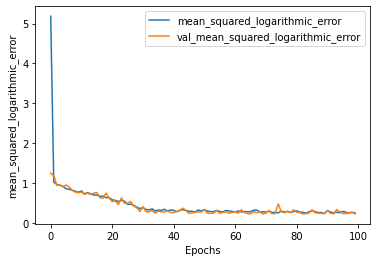

In [46]:
plot_history(trained_model3, 'mean_squared_logarithmic_error')

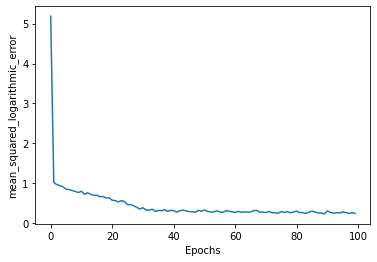

In [53]:
plot_history_(trained_model3, "mean_squared_logarithmic_error")

Epoch 1/100
28/28 [==============================] - 0s 11ms/step - loss: 208719642624.0000 - root_mean_squared_error: 419655.9375 - val_loss: 180877754368.0000 - val_root_mean_squared_error: 425297.2500
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 162815344640.0000 - root_mean_squared_error: 403503.8438 - val_loss: 153970409472.0000 - val_root_mean_squared_error: 392390.6250
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 165546311680.0000 - root_mean_squared_error: 406873.8125 - val_loss: 172785319936.0000 - val_root_mean_squared_error: 415674.5312
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 144029302784.0000 - root_mean_squared_error: 379511.9375 - val_loss: 124145049600.0000 - val_root_mean_squared_error: 352342.2188
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 125201195008.0000 - root_mean_squared_error: 353837.8125 - val_loss: 104810512384.0000 - val_root_mean_squared_err

28/28 [==============================] - 0s 5ms/step - loss: 52512133120.0000 - root_mean_squared_error: 229155.2656 - val_loss: 38152146944.0000 - val_root_mean_squared_error: 195325.7500
Epoch 42/100
28/28 [==============================] - 0s 7ms/step - loss: 48430702592.0000 - root_mean_squared_error: 220069.7656 - val_loss: 55737200640.0000 - val_root_mean_squared_error: 236087.2656
Epoch 43/100
28/28 [==============================] - 0s 6ms/step - loss: 60171141120.0000 - root_mean_squared_error: 245298.0625 - val_loss: 78658420736.0000 - val_root_mean_squared_error: 280461.0938
Epoch 44/100
28/28 [==============================] - 0s 6ms/step - loss: 74118586368.0000 - root_mean_squared_error: 272247.2812 - val_loss: 49365331968.0000 - val_root_mean_squared_error: 222183.1094
Epoch 45/100
28/28 [==============================] - 0s 6ms/step - loss: 63241740288.0000 - root_mean_squared_error: 251479.1094 - val_loss: 37991919616.0000 - val_root_mean_squared_error: 194915.1562
Epo

Epoch 82/100
28/28 [==============================] - 0s 7ms/step - loss: 45975101440.0000 - root_mean_squared_error: 214418.0469 - val_loss: 38913110016.0000 - val_root_mean_squared_error: 197264.0625
Epoch 83/100
28/28 [==============================] - 0s 6ms/step - loss: 44521566208.0000 - root_mean_squared_error: 211001.3438 - val_loss: 38930874368.0000 - val_root_mean_squared_error: 197309.0781
Epoch 84/100
28/28 [==============================] - 0s 6ms/step - loss: 48888254464.0000 - root_mean_squared_error: 221106.8906 - val_loss: 38454005760.0000 - val_root_mean_squared_error: 196096.9219
Epoch 85/100
28/28 [==============================] - 0s 5ms/step - loss: 46434045952.0000 - root_mean_squared_error: 215485.6094 - val_loss: 38467928064.0000 - val_root_mean_squared_error: 196132.4219
Epoch 86/100
28/28 [==============================] - 0s 6ms/step - loss: 44165902336.0000 - root_mean_squared_error: 210156.8594 - val_loss: 35258408960.0000 - val_root_mean_squared_error: 18

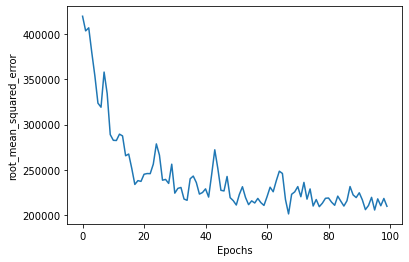

In [54]:
model_rmse3 = build_model_using_sequential_5()
model_rmse3.compile(
        loss=mse, 
        optimizer=Adam(learning_rate=learning_rate), 
        metrics=[rmse]
    )
# Plot the fitted_model
plot_history_(fit_model(model_rmse3), 'root_mean_squared_error')

Epoch 1/100
28/28 [==============================] - 0s 13ms/step - loss: 329230.0312 - mean_absolute_error: 328860.0312 - val_loss: 275321.9375 - val_mean_absolute_error: 275710.4375
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 274637.5312 - mean_absolute_error: 274490.5625 - val_loss: 259134.5156 - val_mean_absolute_error: 259560.2812
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 261401.6250 - mean_absolute_error: 261246.0156 - val_loss: 266308.7188 - val_mean_absolute_error: 266701.5000
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 258555.3125 - mean_absolute_error: 258497.9844 - val_loss: 248821.1562 - val_mean_absolute_error: 249238.8906
Epoch 5/100
28/28 [==============================] - 0s 6ms/step - loss: 258111.7188 - mean_absolute_error: 258559.7500 - val_loss: 275123.9688 - val_mean_absolute_error: 275461.0938
Epoch 6/100
28/28 [==============================] - 0s 7ms/step - loss: 249334.2031

28/28 [==============================] - 0s 6ms/step - loss: 153096.0938 - mean_absolute_error: 152534.0469 - val_loss: 133114.0312 - val_mean_absolute_error: 133308.0000
Epoch 46/100
28/28 [==============================] - 0s 6ms/step - loss: 163103.6094 - mean_absolute_error: 163194.1094 - val_loss: 133884.8438 - val_mean_absolute_error: 134066.4531
Epoch 47/100
28/28 [==============================] - 0s 6ms/step - loss: 162926.4219 - mean_absolute_error: 162797.0312 - val_loss: 150255.3906 - val_mean_absolute_error: 150475.7969
Epoch 48/100
28/28 [==============================] - 0s 6ms/step - loss: 156028.6719 - mean_absolute_error: 155876.4531 - val_loss: 150341.5938 - val_mean_absolute_error: 150557.2344
Epoch 49/100
28/28 [==============================] - 0s 6ms/step - loss: 158669.1719 - mean_absolute_error: 158188.7812 - val_loss: 149820.7500 - val_mean_absolute_error: 149912.8438
Epoch 50/100
28/28 [==============================] - 0s 7ms/step - loss: 158124.7656 - mean_

28/28 [==============================] - 0s 6ms/step - loss: 151166.3906 - mean_absolute_error: 151391.3281 - val_loss: 133893.8750 - val_mean_absolute_error: 134085.0156
Epoch 90/100
28/28 [==============================] - 0s 6ms/step - loss: 148383.8906 - mean_absolute_error: 148429.9219 - val_loss: 149212.0938 - val_mean_absolute_error: 149390.4844
Epoch 91/100
28/28 [==============================] - 0s 6ms/step - loss: 142990.1094 - mean_absolute_error: 142793.6719 - val_loss: 128949.5469 - val_mean_absolute_error: 129111.8359
Epoch 92/100
28/28 [==============================] - 0s 5ms/step - loss: 145731.6250 - mean_absolute_error: 145575.7656 - val_loss: 127627.8438 - val_mean_absolute_error: 127828.1797
Epoch 93/100
28/28 [==============================] - 0s 5ms/step - loss: 154411.7969 - mean_absolute_error: 154887.8281 - val_loss: 155171.0312 - val_mean_absolute_error: 155381.9219
Epoch 94/100
28/28 [==============================] - 0s 5ms/step - loss: 152624.4062 - mean_

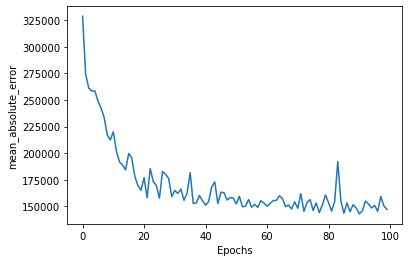

In [55]:
model_mae3 = build_model_using_sequential_5()
model_mae3.compile(
    loss=mae, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mae]
)
plot_history_(fit_model(model_mae3), "mean_absolute_error")

In [47]:
y_pred_5 = pd.DataFrame(data = model_3.predict(x_test), columns = ['crimes'])

In [48]:
naive_roc_auc_score(y_test.values, y_pred_5.values)

0.8221085837622447

## Model-6

In [49]:
hidden_units1 = 480
hidden_units2 = 256
hidden_units3 = 100
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential_6():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='elu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='elu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='elu'),
    Dense(1, kernel_initializer='normal', activation='relu')
  ])
  return model

In [50]:
# build the model
model_4 = build_model_using_sequential_6()

model_4.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
trained_model4 = fit_model(model_4)

Epoch 1/100
28/28 [==============================] - 0s 10ms/step - loss: 2.7668 - mean_squared_logarithmic_error: 2.7526 - val_loss: 1.1009 - val_mean_squared_logarithmic_error: 1.1016
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.9032 - mean_squared_logarithmic_error: 0.9038 - val_loss: 0.8777 - val_mean_squared_logarithmic_error: 0.8792
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 0.8301 - mean_squared_logarithmic_error: 0.8289 - val_loss: 0.7963 - val_mean_squared_logarithmic_error: 0.7976
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.7643 - mean_squared_logarithmic_error: 0.7626 - val_loss: 0.7296 - val_mean_squared_logarithmic_error: 0.7310
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.7335 - mean_squared_logarithmic_error: 0.7352 - val_loss: 0.7072 - val_mean_squared_logarithmic_error: 0.7085
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0

28/28 [==============================] - 0s 5ms/step - loss: 0.2940 - mean_squared_logarithmic_error: 0.2936 - val_loss: 0.2591 - val_mean_squared_logarithmic_error: 0.2590
Epoch 46/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2957 - mean_squared_logarithmic_error: 0.2975 - val_loss: 0.2653 - val_mean_squared_logarithmic_error: 0.2652
Epoch 47/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2827 - mean_squared_logarithmic_error: 0.2824 - val_loss: 0.3319 - val_mean_squared_logarithmic_error: 0.3319
Epoch 48/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2762 - mean_squared_logarithmic_error: 0.2764 - val_loss: 0.2593 - val_mean_squared_logarithmic_error: 0.2593
Epoch 49/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2870 - mean_squared_logarithmic_error: 0.2872 - val_loss: 0.2592 - val_mean_squared_logarithmic_error: 0.2591
Epoch 50/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2917 - 

28/28 [==============================] - 0s 5ms/step - loss: 0.3070 - mean_squared_logarithmic_error: 0.3067 - val_loss: 0.2466 - val_mean_squared_logarithmic_error: 0.2466
Epoch 90/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2906 - mean_squared_logarithmic_error: 0.2905 - val_loss: 0.2747 - val_mean_squared_logarithmic_error: 0.2746
Epoch 91/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2561 - mean_squared_logarithmic_error: 0.2558 - val_loss: 0.2362 - val_mean_squared_logarithmic_error: 0.2362
Epoch 92/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2985 - mean_squared_logarithmic_error: 0.2971 - val_loss: 0.2992 - val_mean_squared_logarithmic_error: 0.2992
Epoch 93/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2801 - mean_squared_logarithmic_error: 0.2792 - val_loss: 0.2403 - val_mean_squared_logarithmic_error: 0.2402
Epoch 94/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2612 - 

In [51]:
y_pred_6 = pd.DataFrame(data = model_4.predict(x_test), columns = ['crimes'])
naive_roc_auc_score(y_test.values, y_pred_6.values)

0.8143361558470308

In [52]:
model_5 = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='elu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='elu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='elu'),
    Dense(1, kernel_initializer='normal', activation='relu')
  ])
model_5.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
y_pred_7 = pd.DataFrame(data = model_5.predict(x_test), columns = ['crimes'])
naive_roc_auc_score(y_test.values, y_pred_7.values)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



0.5